In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'c:\Users\Sushree S Swain\Desktop\combined_data.csv')

In [46]:
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.LandMinTemperature.value_counts()

LandMinTemperature
-1.139    3
 8.184    3
 7.818    3
 8.161    3
 7.892    3
         ..
-3.951    1
-3.324    1
 0.558    1
 3.133    1
 0.287    1
Name: count, Length: 1873, dtype: int64

In [48]:
df = df[['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']]

In [49]:
df.head(1)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,6.068,1.737,Denmark,NaN,NaN


In [50]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [51]:
df.isnull().sum()

dt                                                  0
AverageTemperature                             436623
AverageTemperatureUncertainty                  435884
Country                                          3192
LandAndOceanAverageTemperature               10062726
LandAndOceanAverageTemperatureUncertainty    10062726
dtype: int64

In [52]:
df.AverageTemperature.median()

18.559

In [53]:
df.AverageTemperatureUncertainty.median()

0.5920000000000001

In [54]:
df.LandAndOceanAverageTemperature.median()

15.251000000000001

In [55]:
df.LandAndOceanAverageTemperatureUncertainty.median()

0.122

In [56]:
from sklearn.impute import SimpleImputer
columns_to_impute = [
    'AverageTemperature',
    'AverageTemperatureUncertainty',
    'LandAndOceanAverageTemperature',
    'LandAndOceanAverageTemperatureUncertainty'
]

imputer = SimpleImputer(strategy='median')

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [57]:
df['Country'].fillna('Unknown', inplace=True)

In [58]:
df.isnull().sum()

dt                                           0
AverageTemperature                           0
AverageTemperatureUncertainty                0
Country                                      0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country']).astype('float64')

In [60]:
import pandas as pd
df['dt'] = pd.to_datetime(df['dt'])

df['Unix_Timestamp'] = (df['dt'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df['Ordinal_Date'] = df['dt'].apply(lambda x: x.toordinal())

In [61]:
df.dtypes

dt                                           datetime64[ns]
AverageTemperature                                  float64
AverageTemperatureUncertainty                       float64
Country                                             float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
Unix_Timestamp                                        int64
Ordinal_Date                                          int64
dtype: object

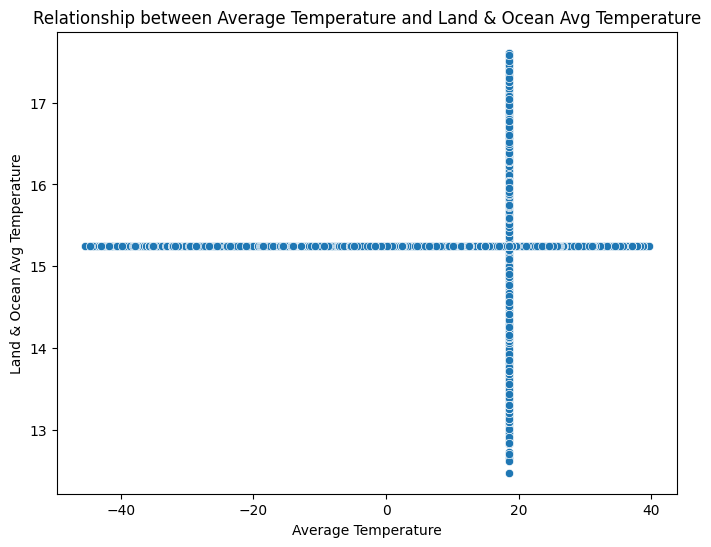

Intercept: 15.250994811558526
Coefficient: -1.4757896655454562e-07


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AverageTemperature', y='LandAndOceanAverageTemperature', data=df)
plt.title('Relationship between Average Temperature and Land & Ocean Avg Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Land & Ocean Avg Temperature')
plt.show()

X = df[['AverageTemperature']]  # Input
y = df['LandAndOceanAverageTemperature']  # Output

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

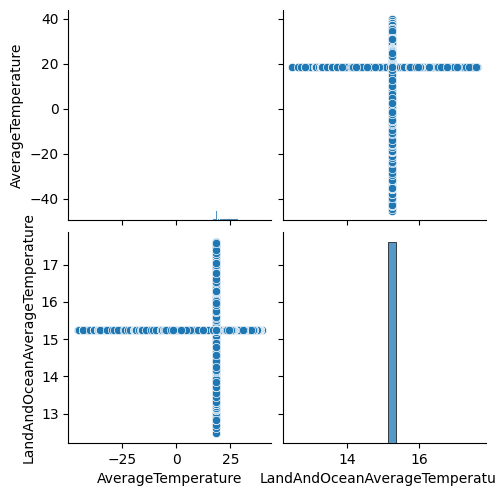

In [63]:
sns.pairplot(df[['AverageTemperature', 'LandAndOceanAverageTemperature']])
plt.show()

In [66]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'Unix_Timestamp',
       'Ordinal_Date'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(['LandAndOceanAverageTemperature', 'dt'], axis=1)  # All columns except the target variable and 'dt'
y = df['LandAndOceanAverageTemperature']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print('Random Forest R-squared:', r2_rf)
print('Random Forest Mean Squared Error:', mse_rf)

Random Forest R-squared: 0.1609056500130397
Random Forest Mean Squared Error: 0.0002588825322286648
